## FULL WORKING: Contour Evolution Animation

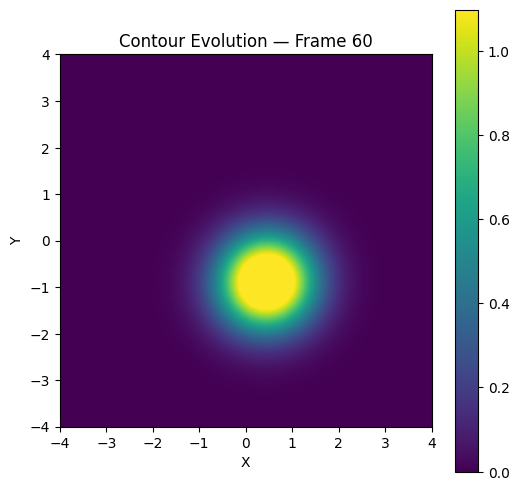

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

# --------------------------------------------------
# Output directory
# --------------------------------------------------
os.makedirs("gifs", exist_ok=True)

# --------------------------------------------------
# Grid
# --------------------------------------------------
x = np.linspace(-4, 4, 200)
y = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, y)

# --------------------------------------------------
# Evolving surface function
# --------------------------------------------------
def surface(t):
    return (
        np.exp(-((X - np.sin(t))**2 + (Y - np.cos(t))**2)) +
        0.6 * np.exp(-((X + np.cos(t / 2))**2 + (Y - np.sin(t / 2))**2))
    )

# Precompute frames
frames = [surface(t * 0.15) for t in range(60)]

# --------------------------------------------------
# Plot
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 6))

img = ax.imshow(
    frames[0],
    extent=[-4, 4, -4, 4],
    origin="lower",
    cmap="viridis",
    animated=True
)

ax.set_title("Contour Evolution (Heatmap Representation)")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.colorbar(img, ax=ax)

# --------------------------------------------------
# Animation
# --------------------------------------------------
writer = PillowWriter(fps=6)

with writer.saving(fig, "gifs/contour_evolution.gif", dpi=120):
    for i, frame in enumerate(frames):
        img.set_data(frame)
        ax.set_title(f"Contour Evolution — Frame {i+1}")
        writer.grab_frame()

plt.show()
